# LAB 2_1: Hebbian Learning - Second dataset

Load the data 
- rows are input dimensions
- columns are different input patterns

In [1]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import pandas as pd
import json
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
import itertools
import torch

from learning_rules import HebbianLearning

In [2]:
dset = pd.read_csv('./data/dataset2_lab_2_1.csv', header=None).to_numpy()#.squeeze()

dset

array([[  12. ,   11.5,   11. ,   12. ,   10.5,   10. ,    9. ,    8.5,
          10. ,    8.5,   17.5,   11.5,   11. ,   10.5,   11. ,   10. ,
           8. ,    8. ,    9.5,   10. ,   15. ,   15.5,   15.5,   16. ,
          14.5,   20.5,   17.5,   14.5,   17.5,   12.5,   15. ,   14. ,
          15. ,   13.5,   18.5,   14.5,   15.5,   14. ,   19. ,   20. ,
          13. ,   15.5,   15.5,   15.5,   15.5,   12. ,   11.5,   13.5,
          13. ,   11.5,   12. ,   12. ,   13.5,   19. ,   15. ,   14.5,
          14. ,   14. ,   19.5,   14.5,   19. ,   18. ,   19. ,   20.5,
          15.5,   17. ,   23.5,   19.5,   16.5,   12. ,   12. ,   13.5,
          13. ,   11.5,   11. ,   13.5,   13.5,   12.5,   13.5,   12.5,
          14. ,   16. ,   14. ,   14.5,   18. ,   19.5,   18. ,   16. ,
          17. ,   14.5,   15. ,   16.5,   13. ,   11.5,   13. ,   14.5,
          12.5,   11.5,   12. ,   13. ,   14.5,   11. ,   11. ,   11. ,
          16.5,   18. ,   16. ,   16.5,   16. ,   21. ,   14. , 

Text(0.5, 1.0, 'Scatterplot of data distribution')

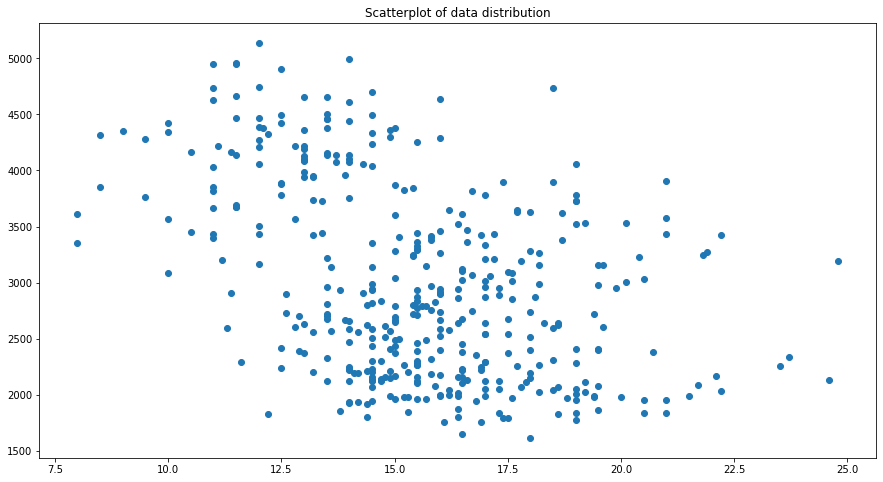

In [3]:
plt.figure(figsize=(15,8))
plt.scatter(*dset)
plt.title('Scatterplot of data distribution')

## Assignment 1: Basic Hebbian Learning

In [4]:
np.random.seed()

# epochs=200
# threshold = 0.000001

In [5]:
def training(hl, rule, data, epochs=200, threshold=1e-4):
    w = hl.w_init
    w_set=[]
    for i in range(epochs):
        data = data[:, np.random.permutation(data.shape[1])]
        w_old = w.copy()
        for j in range(data.shape[1]):
            u=data[:,j]
            v=np.dot(u,w) 
            w = rule(u, v, w)
            # w_set.append(w)
            if np.any(np.isnan(w)) or np.any(np.isinf(w)) or np.any(w == -0) or np.any(w == 0):
                continue
            w_set.append(w)
        if i>2 and linalg.norm(w-w_old) < threshold:
            break  
    return w_set           

In [6]:
hl=HebbianLearning(data_shape=dset.shape[0])
h_rule = hl.hebbian_rule
basic_hl_W=training(hl, h_rule, dset)

print('Final results for w:', basic_hl_W[-1])
torch.save(torch.tensor(basic_hl_W), 'results/D2basic_hl_W.pt')

<ipython-input-5-833a3d3e1036>:15: RuntimeWarning: invalid value encountered in subtract
  if i>2 and linalg.norm(w-w_old) < threshold:


Final results for w: [-7.58372865e+302 -1.43452277e+305]


After training is completed plot a figure displaying (on the same graph) the training data points (points in the bidimensional space), the final weight vector w resulting from the learning process and the principal eigenvector of input correlation matrix Q.

In [7]:
def princ_comp(dset):
        #input correlation matrix
        Q = np.cov(dset.T)
        #ensure the matrix is symmetric (robustness)
        # Q = (Q + Q.T) / 2
        #principal eigenvector of Q
        eigenvalues, eigenvectors = np.linalg.eig(Q)
        sorted_indices = np.argsort(eigenvalues)[::-1]  # put results in descending order
        sorted_eigenvectors = eigenvectors[:, sorted_indices]
        # principal_eigenvector = eigenvectors[:, np.argmax(eigenvalues)]
        return Q, sorted_eigenvectors[:,0], sorted_eigenvectors[:,1] 


In [8]:
Q, pc1, pc2=princ_comp(dset)

In [9]:
def plot_eig(ax, dset, final_w, pc1, pc2): 
    # plot the training data points
    ax.scatter(*dset, label='Training data points')
    # plot the final weight vector
    ax.quiver(0, 0, final_w[0], final_w[1], color='black', label='Final weight vector') #angles='xy', scale_units='xy', scale=1,
    # Plot the principal eigenvector
    ax.quiver(0, 0, pc1[0], pc1[1], color='blue', label='Principal component') #angles='xy', scale_units='xy', scale=1,
    # Plot the secondary eigenvector
    ax.quiver(0, 0, pc2[0], pc2[1], color='purple', label='Second principal component') #angles='xy', scale_units='xy', scale=1,

    ax.legend()
    # ax.set_title('Training Data, Final Weight Vector, and Principal Eigenvector')
    plt.show()


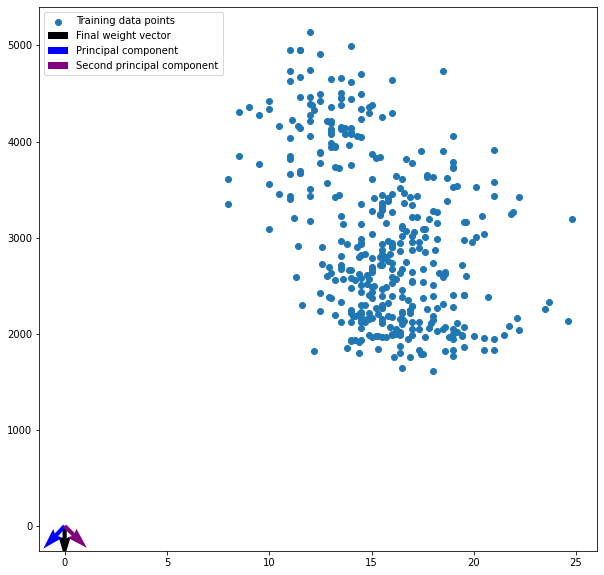

In [10]:
plt.figure(figsize=(10, 10))
plot_eig(plt, dset, basic_hl_W[-1], pc1, pc2)

Generate two figures plotting the evolution in time of the two components of the weight vector _w_. The plot will have time on the _x_ axis, and the weight value on the _y_ axis (provide a separate plot for each component of the weight vector).

Finally, provide another plot of the evolution in time of
the norm of the weight vector during training. 

_Note: in this point, 3 plots are required_

In [11]:
def multiplot(dset, w_set, title):
    #instatiate the plot grid
    plt.figure(figsize=(15, 15))
    plt.suptitle(title)
    
    steps = list(range(len(w_set))) 
    
    #1st PLOT: first component of W
    first = [w[0] for w in w_set]
    ax = plt.subplot(3, 2, 1)
    ax.grid(True)
    ax.set_title('First component of W')
    ax.plot(steps, first)
    ax.set_xlabel('Time')
    ax.set_ylabel('W[0]')

    #2nd PLOT: second component of W
    second = [w[1] for w in w_set]
    ax = plt.subplot(3, 2, 2)
    ax.grid(True)
    ax.set_title('Second component of W')
    ax.plot(steps, second)
    ax.set_xlabel('Time')
    ax.set_ylabel('W[1]')

    #3rd PLOT: norm of W evolution
    ax = plt.subplot(3, 2, 3)
    ax.grid(True)
    ax.set_title('Evolution of weight norm in training')
    norms = [np.linalg.norm(w) for w in w_set]
    ax.plot(steps, norms)
    ax.set_xlabel('Time')
    ax.set_ylabel('|W|')

    #4th (last) PLOT: final weights, eigenvalues, data 
    ax = plt.subplot(3, 2, 4)
    ax.grid(True)
    ax.set_title('Final weights and PC with data')
    plot_eig(ax, dset,w_set[-1],  pc1, pc2) #final_w,
    
    plt.savefig(str('plots/D2_'+(title.replace(" ", "_")).lower()+'.jpeg'), edgecolor='black', dpi=400, transparent=True)



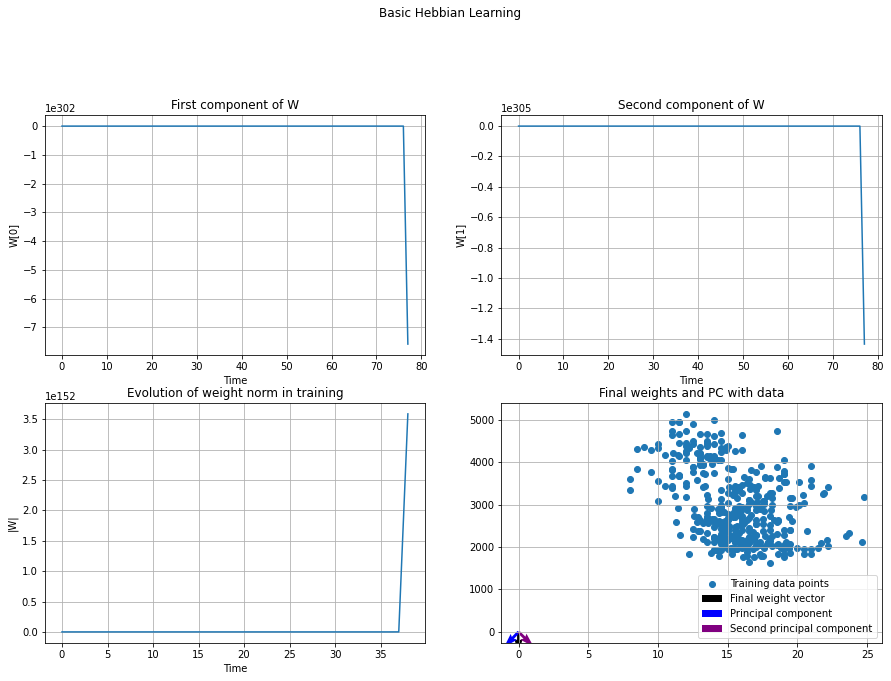

<Figure size 432x288 with 0 Axes>

In [12]:
multiplot(dset, basic_hl_W, "Basic Hebbian Learning")

## Assignment 2: Oja rule

c:\Users\Francesca\OneDrive\Desktop\cns_labs\computational-neuroscience\LAB2_1\learning_rules.py:24: RuntimeWarning: overflow encountered in power
  w = (v * u) - self.alpha * (np.power(v, 2) * w)


Final weights with alpha= 1 [-1.99642101e+261  1.03652417e+263]


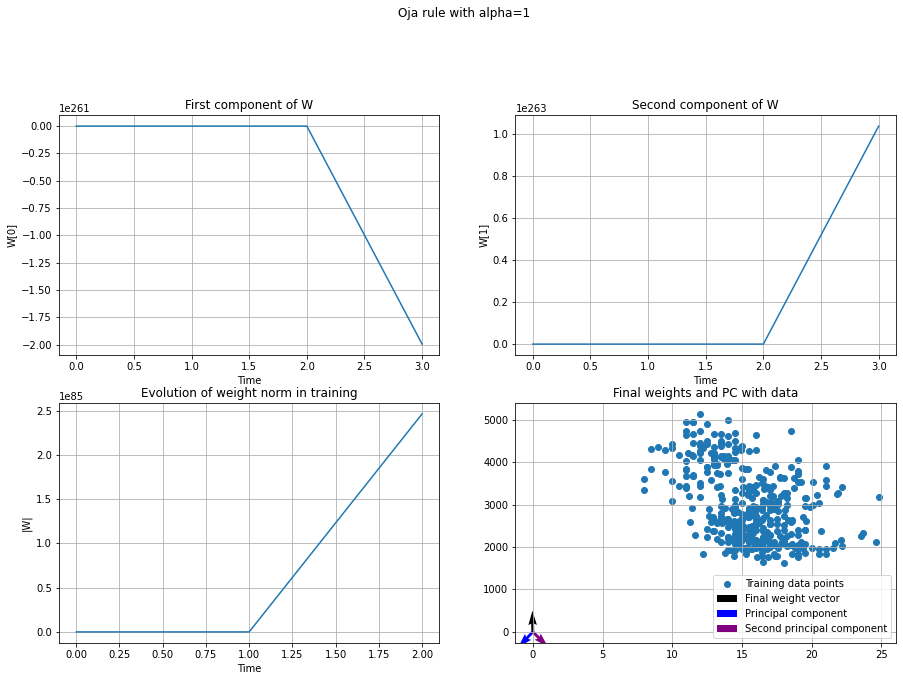

c:\Users\Francesca\OneDrive\Desktop\cns_labs\computational-neuroscience\LAB2_1\learning_rules.py:24: RuntimeWarning: invalid value encountered in subtract
  w = (v * u) - self.alpha * (np.power(v, 2) * w)


Final weights with alpha= 0.5 [-4.33736762e+228 -1.65172047e+230]


<Figure size 432x288 with 0 Axes>

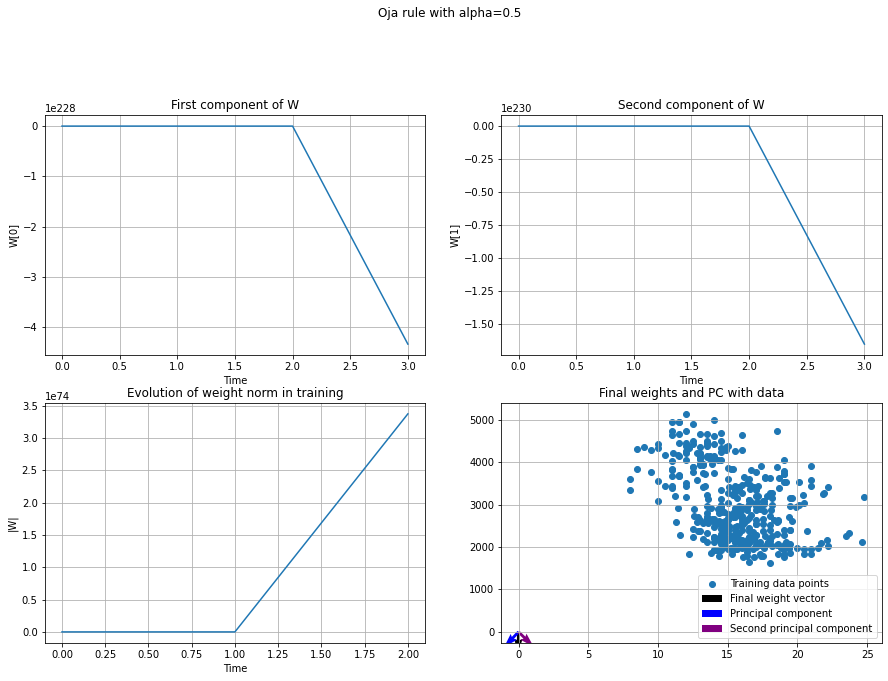

Final weights with alpha= 0.3 [-6.24700981e+272  1.50634905e+273]


<Figure size 432x288 with 0 Axes>

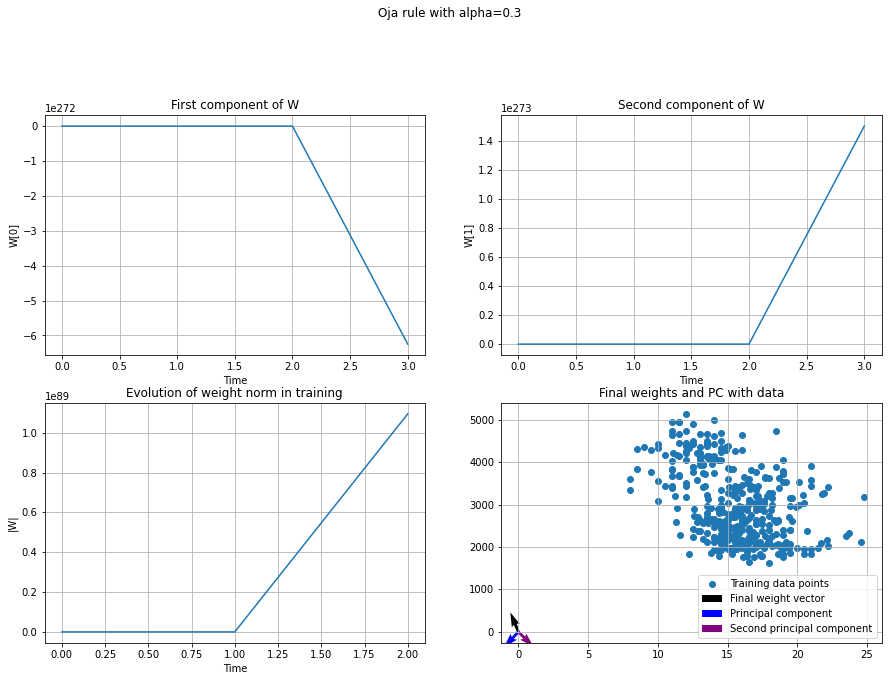

Final weights with alpha= 0.01 [5.20182065e+228 8.56279222e+230]


<Figure size 432x288 with 0 Axes>

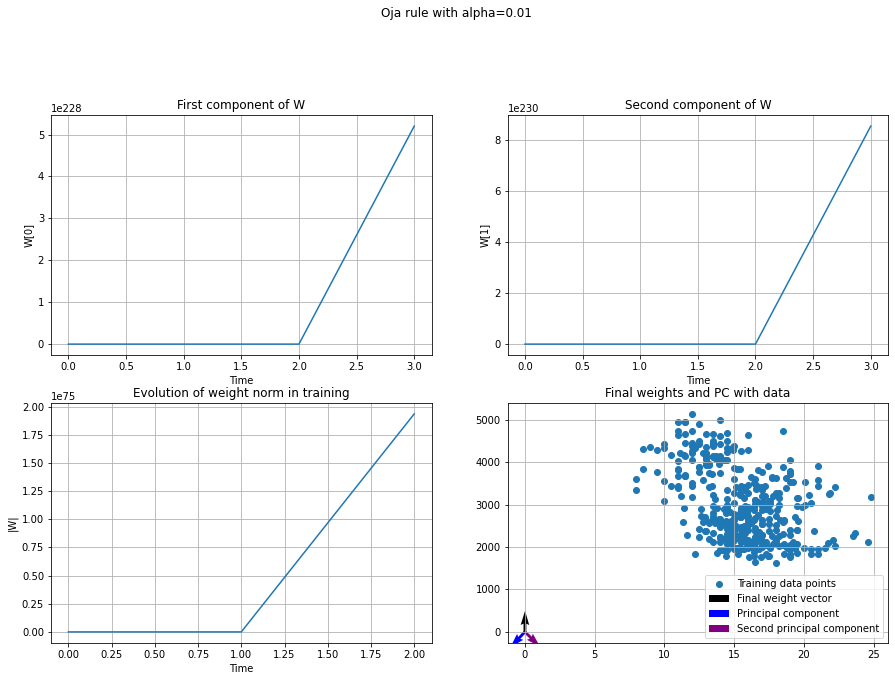

Final weights with alpha= 0.001 [-3.62847605e+191 -6.14208786e+193]


<Figure size 432x288 with 0 Axes>

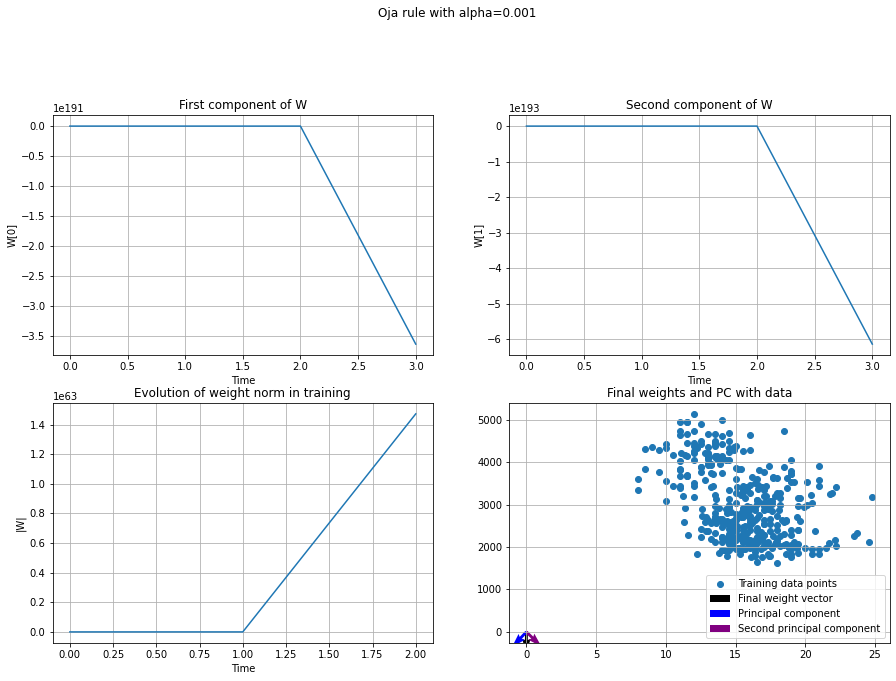

<Figure size 432x288 with 0 Axes>

In [13]:
alpha=[1, 0.5, 0.3, 0.01, 0.001]
for a in alpha:
    hl=HebbianLearning(data_shape=dset.shape[0], alpha=a)
    h_rule = hl.oja_rule
    oja_W = training(hl, h_rule, dset)

    print('Final weights with alpha=', a, oja_W[-1])
    multiplot(dset, oja_W, f"Oja rule with alpha={a}")
    torch.save(torch.tensor(oja_W), f'results/D2oja_W_{a}.pt')

## Assignment 3: Subtractive normalization rule

c:\Users\Francesca\OneDrive\Desktop\cns_labs\computational-neuroscience\LAB2_1\learning_rules.py:28: RuntimeWarning: overflow encountered in multiply
  w = v * u - (v * (self.one.T @ u) * self.one) / 2
c:\Users\Francesca\OneDrive\Desktop\cns_labs\computational-neuroscience\LAB2_1\learning_rules.py:28: RuntimeWarning: overflow encountered in double_scalars
  w = v * u - (v * (self.one.T @ u) * self.one) / 2
c:\Users\Francesca\OneDrive\Desktop\cns_labs\computational-neuroscience\LAB2_1\learning_rules.py:28: RuntimeWarning: invalid value encountered in subtract
  w = v * u - (v * (self.one.T @ u) * self.one) / 2


Final weights: [-7.61316132e+303  7.61316132e+303]


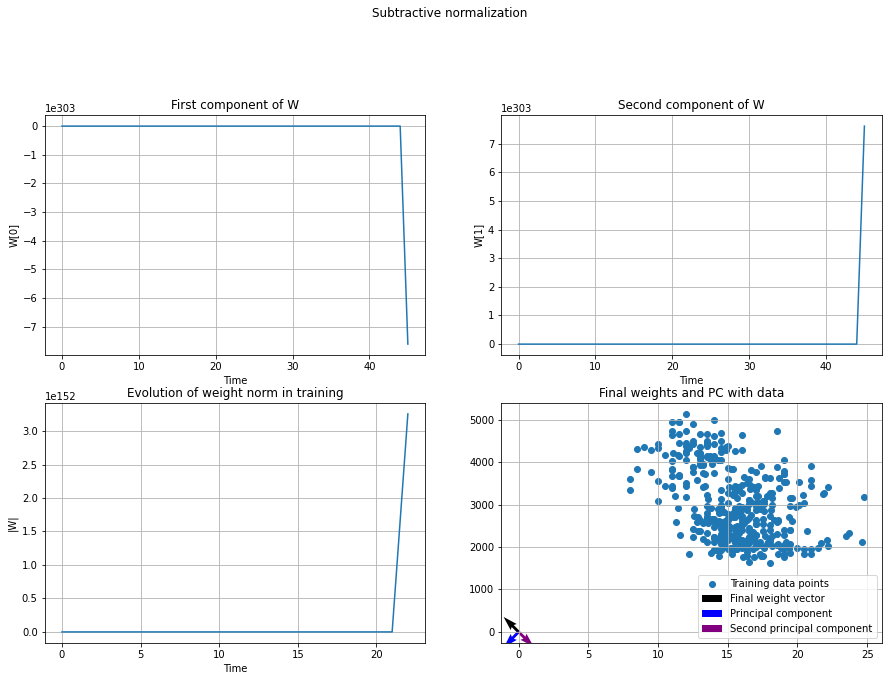

<Figure size 432x288 with 0 Axes>

In [14]:
hl=HebbianLearning(data_shape=dset.shape[0], one=np.ones(dset.shape[0]))
h_rule = hl.sub_norm
subnorm_W=training(hl, h_rule, dset)

print('Final weights:', subnorm_W[-1])
multiplot(dset, subnorm_W, "Subtractive normalization")
torch.save(torch.tensor(subnorm_W), 'results/D2subnorm_W.pt')

## Bonus track 1: BCM rule

c:\Users\Francesca\OneDrive\Desktop\cns_labs\computational-neuroscience\LAB2_1\learning_rules.py:35: RuntimeWarning: overflow encountered in multiply
  return v * u * (v - self.theta)
c:\Users\Francesca\OneDrive\Desktop\cns_labs\computational-neuroscience\LAB2_1\learning_rules.py:34: RuntimeWarning: invalid value encountered in double_scalars
  self.theta += self.theta_lr * (np.power(v, 2) - self.theta)


Final weights with theta= 0.5 and lr= 0.01 [4.70079613e+141 7.45540278e+143]


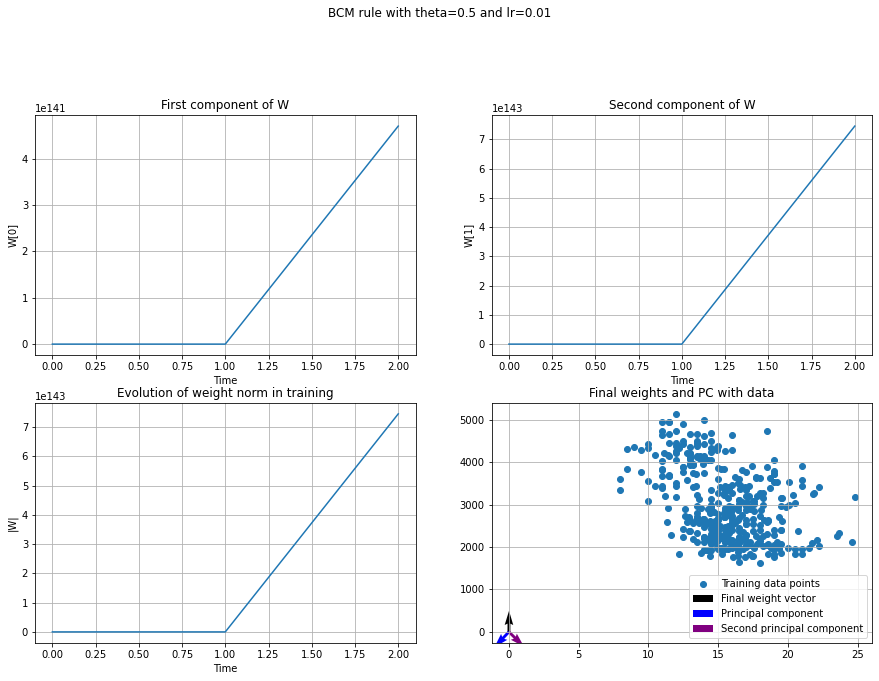

Final weights with theta= 0.5 and lr= 0.001 [1.78917635e+122 2.96883995e+124]


<Figure size 432x288 with 0 Axes>

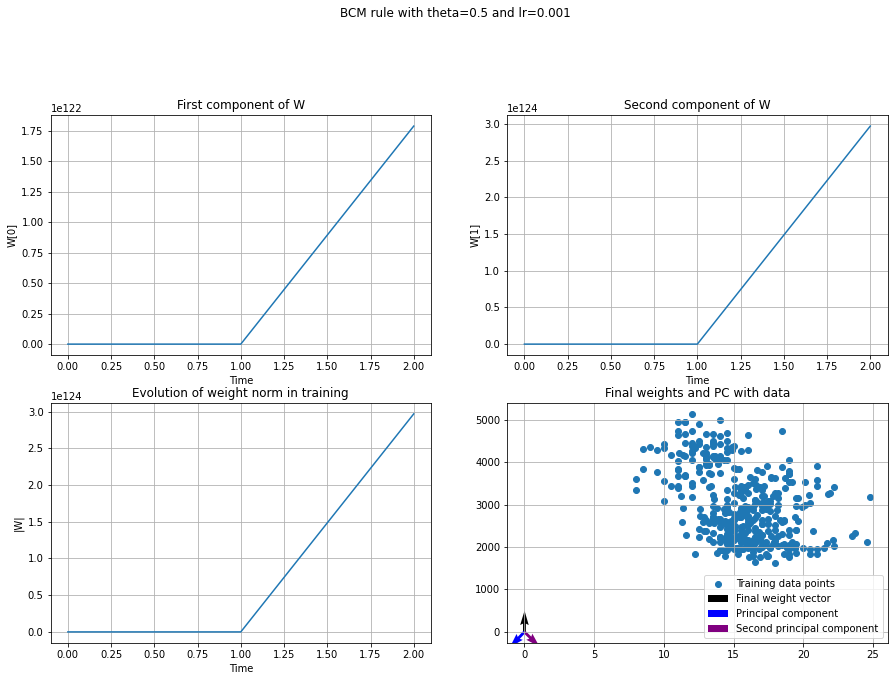

c:\Users\Francesca\OneDrive\Desktop\cns_labs\computational-neuroscience\LAB2_1\learning_rules.py:35: RuntimeWarning: invalid value encountered in double_scalars
  return v * u * (v - self.theta)


Final weights with theta= 0.1 and lr= 0.01 [-3.34424310e+135 -6.55647661e+137]


<Figure size 432x288 with 0 Axes>

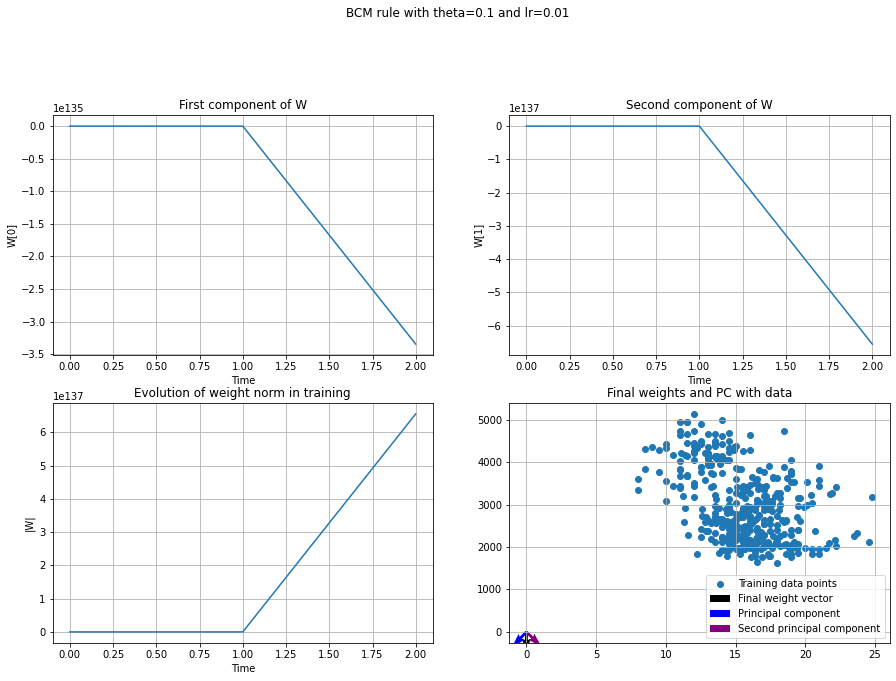

Final weights with theta= 0.1 and lr= 0.001 [-3.45555254e+125 -4.54068032e+127]


<Figure size 432x288 with 0 Axes>

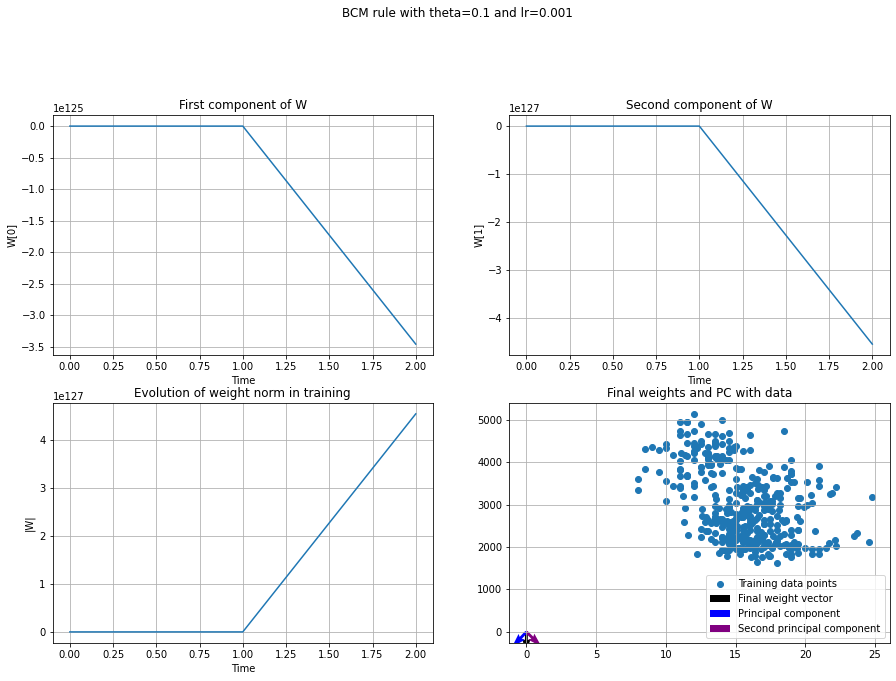

Final weights with theta= 0.05 and lr= 0.01 [-1.01149572e+134 -1.00036927e+136]


<Figure size 432x288 with 0 Axes>

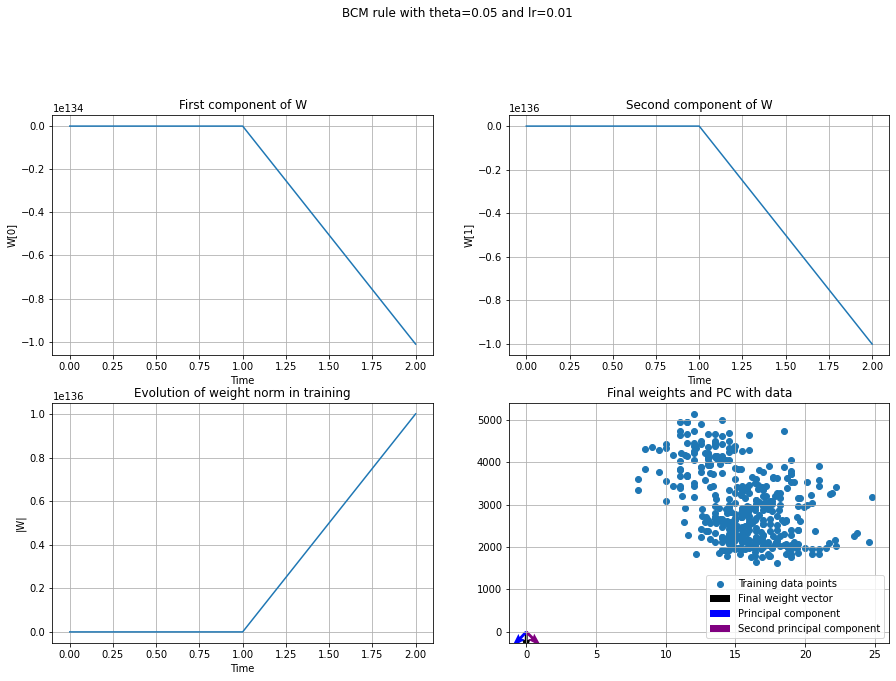

Final weights with theta= 0.05 and lr= 0.001 [2.56800798e+127 4.81907827e+129]


<Figure size 432x288 with 0 Axes>

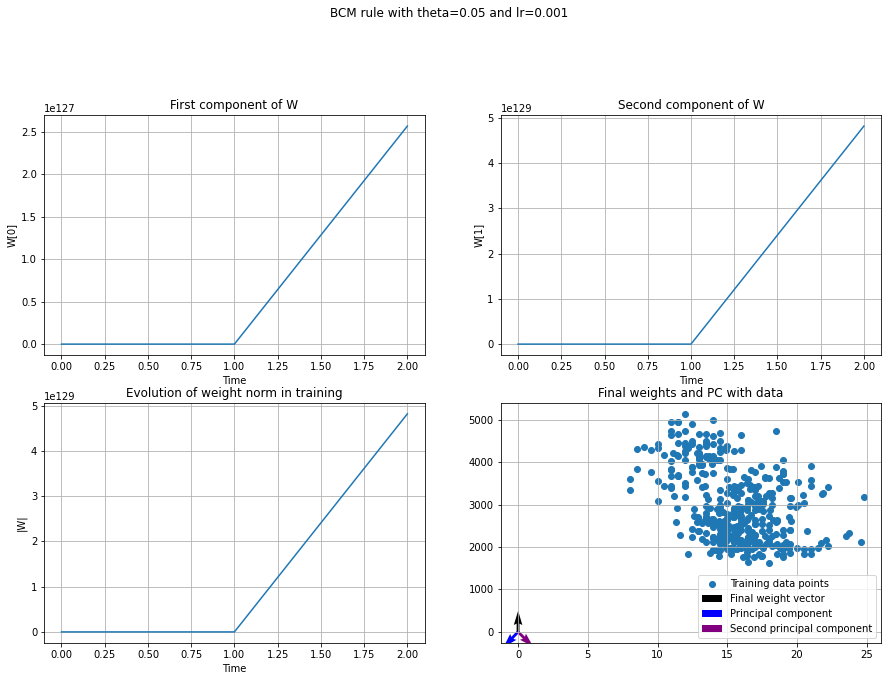

Final weights with theta= 0.01 and lr= 0.01 [4.71468416e+132 8.13836755e+134]


<Figure size 432x288 with 0 Axes>

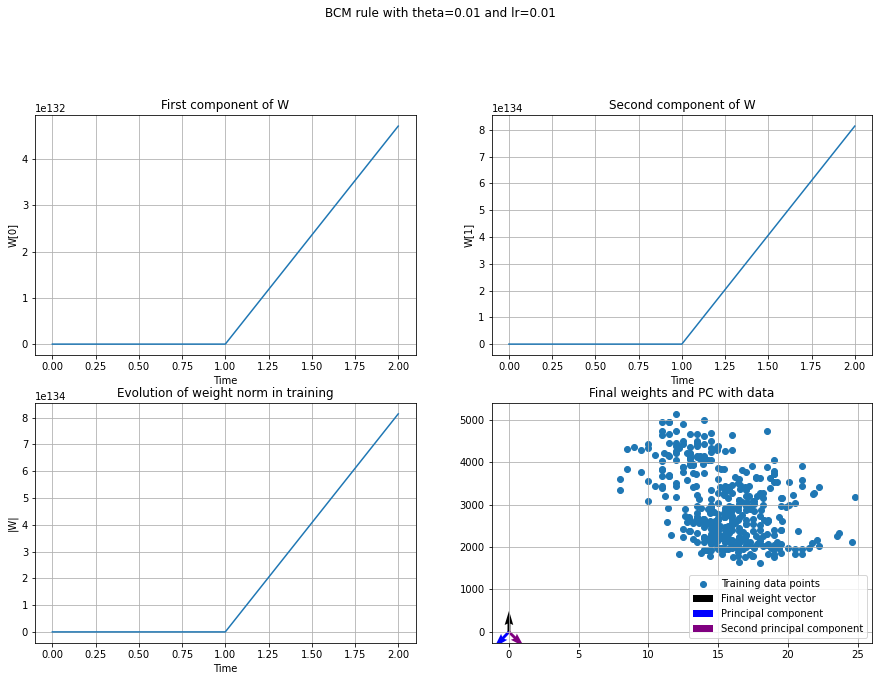

Final weights with theta= 0.01 and lr= 0.001 [1.54277241e+137 5.06764003e+139]


<Figure size 432x288 with 0 Axes>

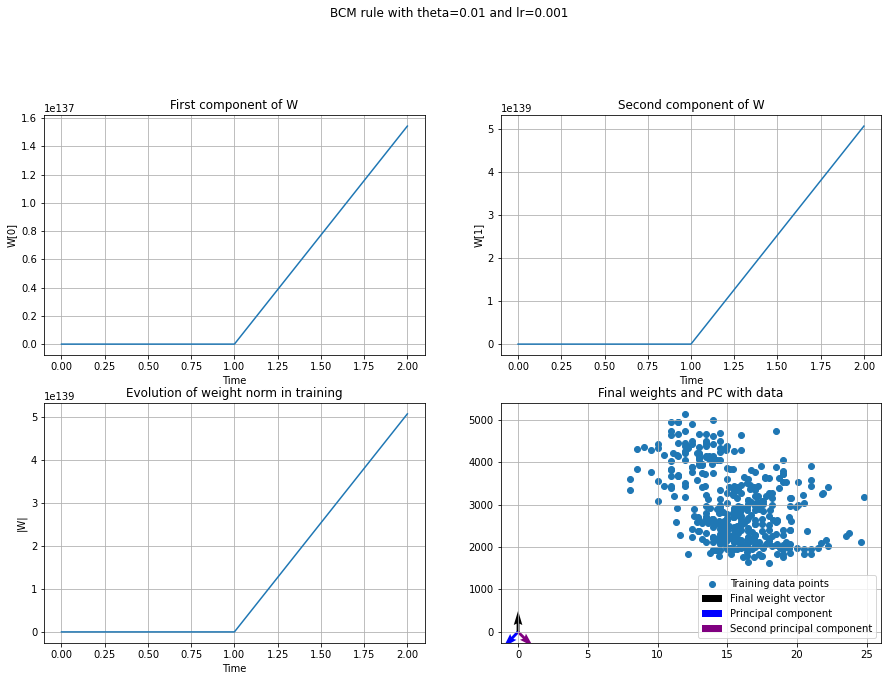

<Figure size 432x288 with 0 Axes>

In [15]:
params={
    'theta':[0.5, 0.1, 0.05, 0.01],
    'th_lr':[0.01, 0.001]
}

param_names=list(params.keys())
param_values=list(params.values())
param_combinations=list(itertools.product(*param_values))

param_grid=[]
for combination in param_combinations:
    param_grid.append(dict(zip(param_names, combination)))
    
for config in param_grid:
    hl=HebbianLearning(data_shape=dset.shape[0], theta=config['theta'], th_lr=config['th_lr'])
    h_rule = hl.bcm
    bcm_w = training(hl, h_rule, dset)
    if bcm_w:
        print('Final weights with theta=', +config['theta'], 'and lr=', config['th_lr'], bcm_w[-1])
        multiplot(dset, bcm_w, f"BCM rule with theta={config['theta']} and lr={config['th_lr']}")
        theta = config['theta']
        th_lr = config['th_lr']
        torch.save(torch.tensor(bcm_w), f'results/D2bcm_W_{theta}_{th_lr}.pt')

## Bonus track 2: Covariance rule

c:\Users\Francesca\OneDrive\Desktop\cns_labs\computational-neuroscience\LAB2_1\learning_rules.py:39: RuntimeWarning: overflow encountered in multiply
  return v * (u - self.theta)
c:\Users\Francesca\OneDrive\Desktop\cns_labs\computational-neuroscience\LAB2_1\learning_rules.py:38: RuntimeWarning: overflow encountered in matmul
  v = w @ u
<ipython-input-5-833a3d3e1036>:15: RuntimeWarning: invalid value encountered in subtract
  if i>2 and linalg.norm(w-w_old) < threshold:


Final weights with theta= 0.01 [-1.79829089e+301 -2.31424537e+303]


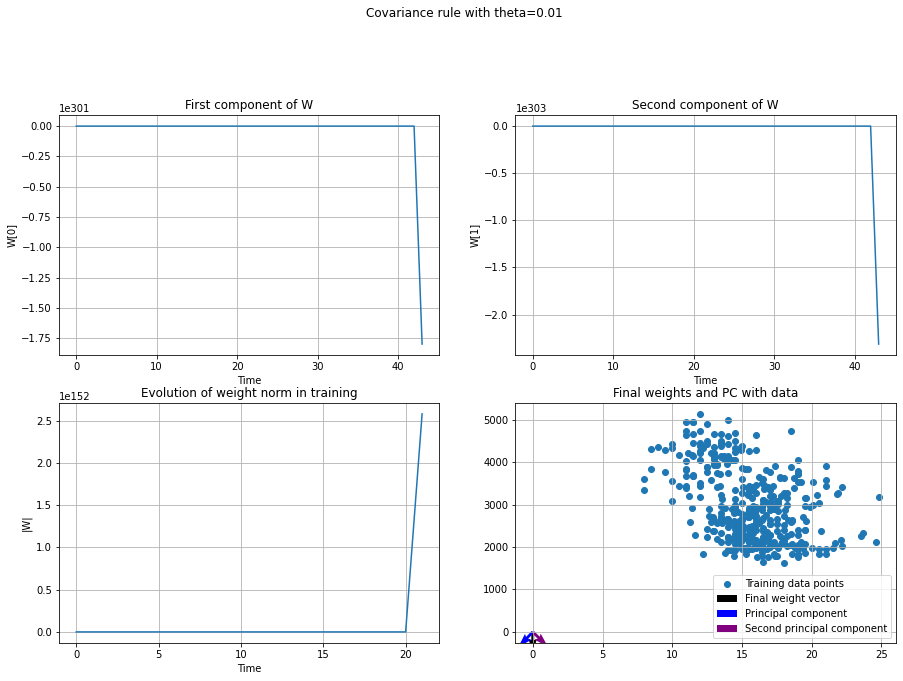

Final weights with theta= 0.1 [-1.06526467e+302 -2.32760331e+304]


<Figure size 432x288 with 0 Axes>

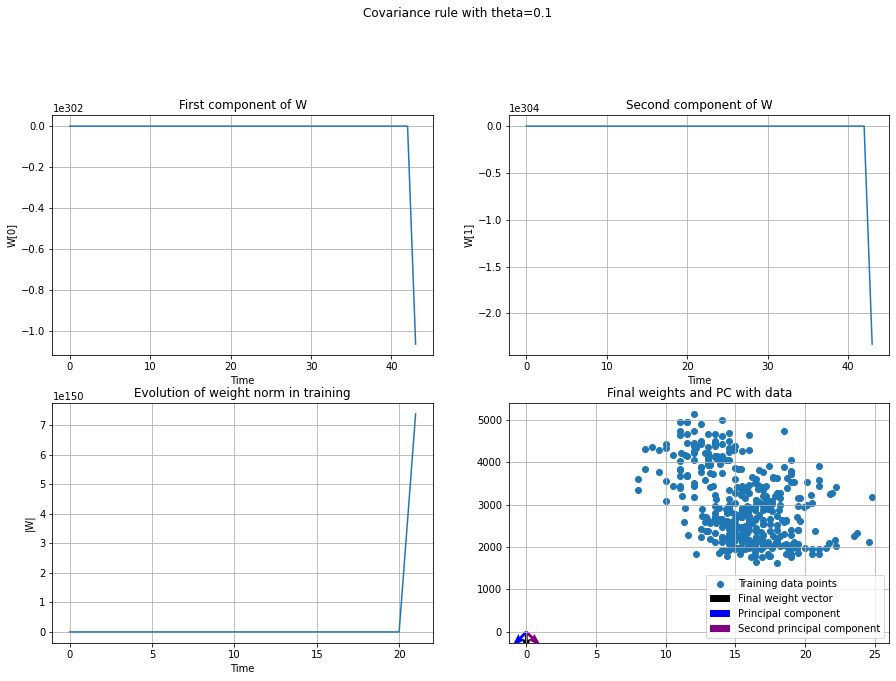

Final weights with theta= 1 [1.17015356e+304 1.78903478e+306]


<Figure size 432x288 with 0 Axes>

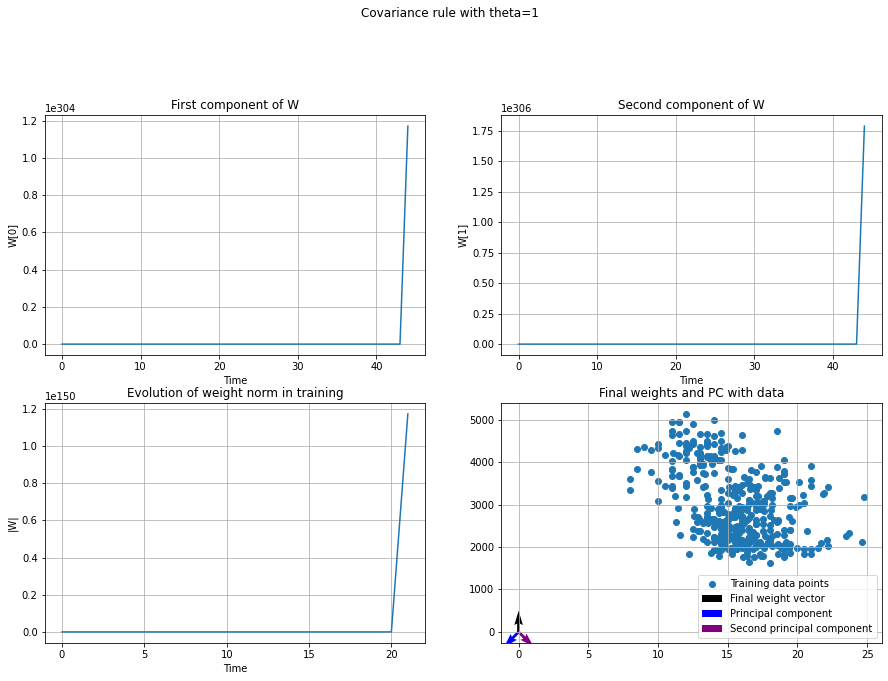

Final weights with theta= 5 [-1.72966069e+301 -4.51004985e+303]


<Figure size 432x288 with 0 Axes>

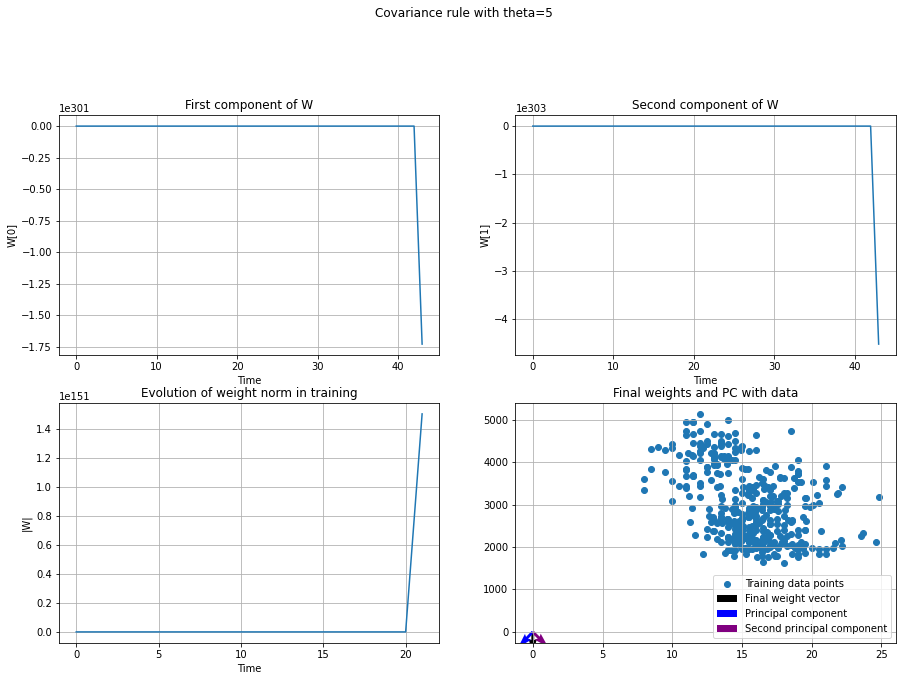

c:\Users\Francesca\OneDrive\Desktop\cns_labs\computational-neuroscience\LAB2_1\learning_rules.py:39: RuntimeWarning: invalid value encountered in multiply
  return v * (u - self.theta)


Final weights with theta= 10 [-4.18317998e+299 -2.10223809e+302]


<Figure size 432x288 with 0 Axes>

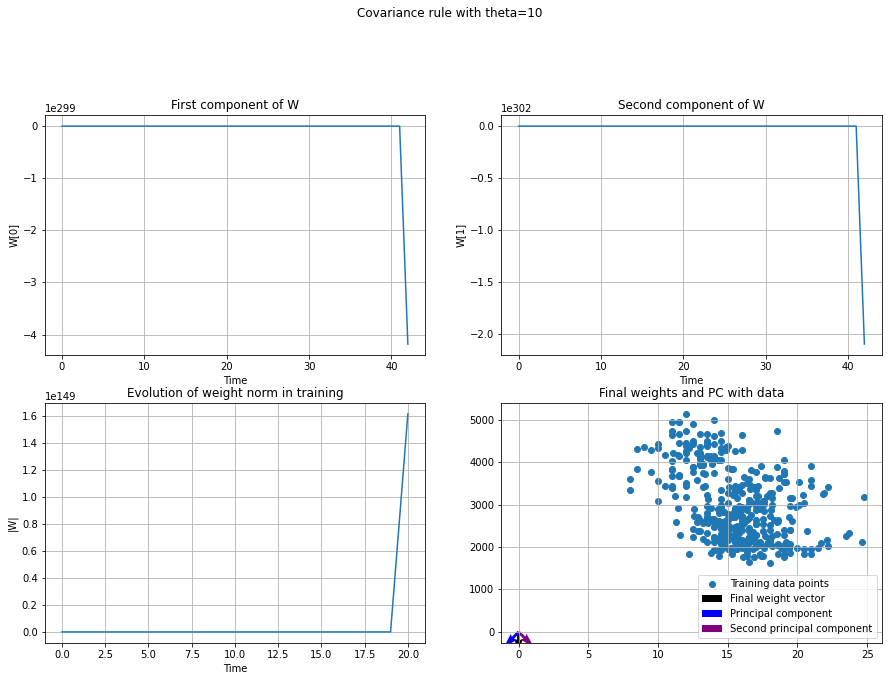

c:\Users\Francesca\OneDrive\Desktop\cns_labs\computational-neuroscience\LAB2_1\learning_rules.py:38: RuntimeWarning: invalid value encountered in matmul
  v = w @ u


Final weights with theta= 50 [-6.20333280e+299  7.77251388e+301]


<Figure size 432x288 with 0 Axes>

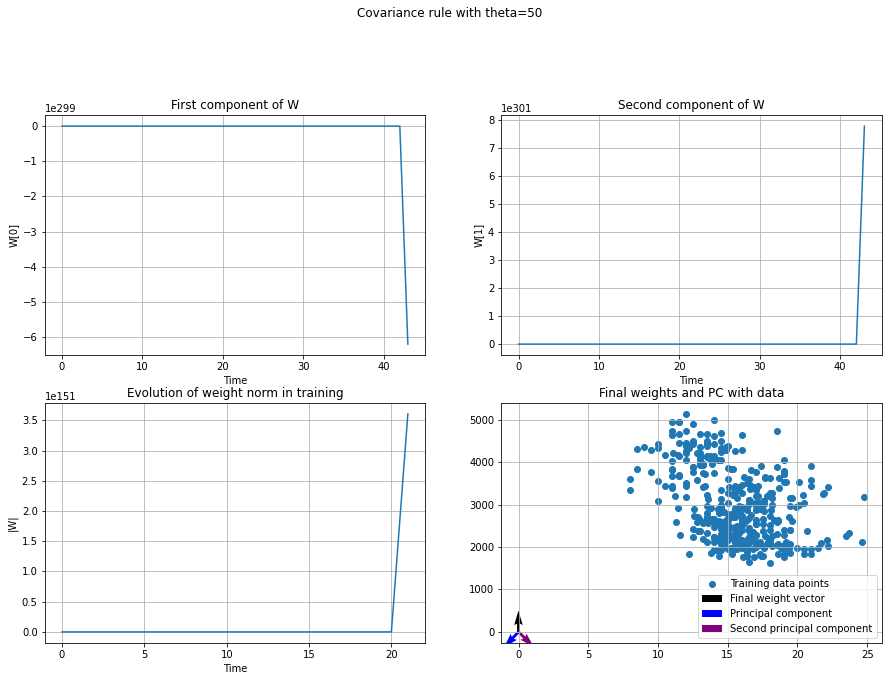

Final weights with theta= 100 [ 1.15256285e+302 -3.90362060e+303]


<Figure size 432x288 with 0 Axes>

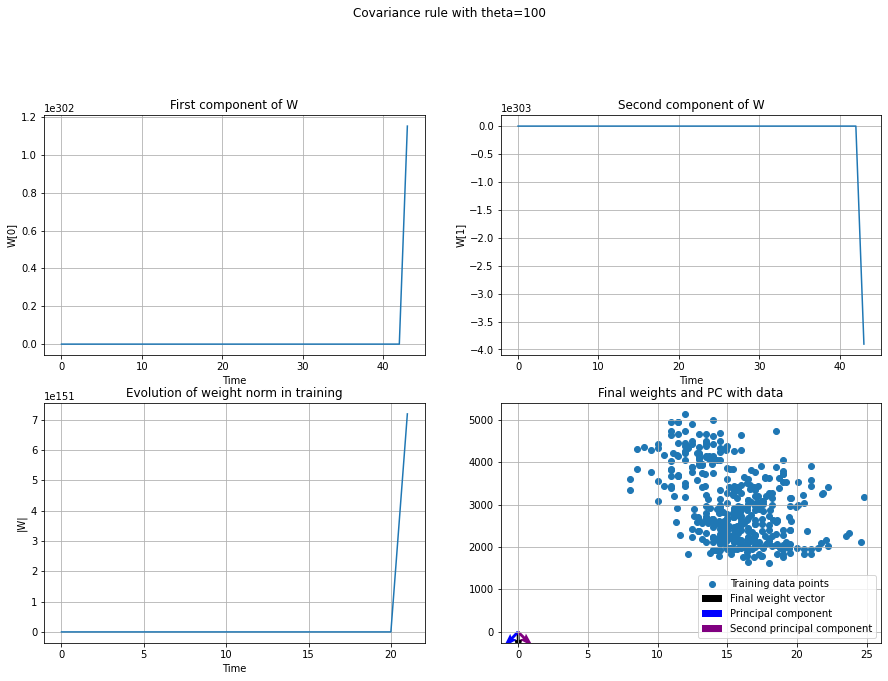

<Figure size 432x288 with 0 Axes>

In [16]:
theta=[0.01, 0.1, 1, 5, 10, 50, 100]
for t in theta:
    hl=HebbianLearning(data_shape=dset.shape[0], theta=t)
    h_rule = hl.covariance
    cov_W = training(hl, h_rule, dset)

    print('Final weights with theta=', t, cov_W[-1])
    multiplot(dset, cov_W, f"Covariance rule with theta={t}")
    torch.save(torch.tensor(cov_W), f'results/D2cov_W_{t}.pt')